<a href="https://colab.research.google.com/github/mtitarik/flickr_img_dloader_multi_process/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

gdrive_home_dir = '/content/drive/My Drive/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# move files to a single directory


import glob
from shutil import copyfile

path_prefix = '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/'

files = glob.glob(path_prefix+'*.jpg')
print(files)
len(files)


['/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/basset_hound_163.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/chihuahua_28.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/english_setter_192.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/Bombay_160.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/english_cocker_spaniel_179.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/pomeranian_93.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/english_setter_45.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/Maine_Coon_25.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/Maine_Coon_91.jpg', '/content/drive/My Drive/CSC551_Spring2019/datasets/Oxford_IIIT_Pet/images/Abyssinian_15.jpg', '/content/drive/My Drive/CSC

7390

In [0]:
class_prefix = set([ l[l.rfind('/')+1:l.rfind('_')] for l in files]) 


In [0]:
k = [os.mkdir(path_prefix.replace('images','imfolder')+l) for l in class_prefix]


In [0]:
for f in files:
  classname = l[l.rfind('/')+1:l.rfind('_')]
  newpath = f.replace("/images/","/imfolder/"+classname+"/")

  copyfile(f, newpath)

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
# # for CIFAR

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train_minibatch_size = 16
# test_minibatch_size = 16

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)

# trainloader = torch.utils.data.DataLoader(trainset, batch_size = train_minibatch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size = test_minibatch_size,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# trainset_sz = len(trainset)
# testset_sz = len(testset)
# print(trainset_sz)
# print(testset_sz)

Files already downloaded and verified
Files already downloaded and verified
50000
10000


In [0]:
# import torch
# from torchvision import transforms, datasets


# data_transform = transforms.Compose([
#         transforms.RandomResizedCrop(32),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                              std=[0.229, 0.224, 0.225])
#     ])
# hymenoptera_dataset = datasets.ImageFolder(root='/content/drive/My Drive//CSC551_Spring2019/datasets/test_dataset/train',
#                                            transform=data_transform)
# trainloader = torch.utils.data.DataLoader(hymenoptera_dataset,
#                                              batch_size=4, shuffle=True,
#                                              num_workers=4)

# classes = ('tiger','bear')


In [0]:
for im, labels in trainloader:
  print(im.shape)
  break

torch.Size([16, 3, 32, 32])


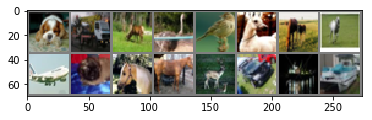

  dog truck  deer  bird


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3) # output size: (32 - 3)/1 + 1 = 30
        self.pool = nn.MaxPool2d(2, 2)  # output size: 39/2 = 15
        self.conv1_bn = nn.BatchNorm2d(6) 
        
        self.conv2 = nn.Conv2d(6, 16, 3) # outputsize: (15 - 3)/1 + 1 = 13
                                         # pooling here: output size: 13//2 = 6
        self.conv2_bn = nn.BatchNorm2d(16) 
        
        self.conv3 = nn.Conv2d(16, 32, 3) # outputsize: (6 - 3)/1 + 1 = 4

        self.conv3_bn = nn.BatchNorm2d(32) 
        
        self.conv4 = nn.Conv2d(32, 64, 3) # outputsize: (4 - 3)/1 + 1 = 2

        self.conv4_bn = nn.BatchNorm2d(64) 
        
        self.fc1 = nn.Linear(in_features = 64 * 2 * 2, out_features = 120)
        self.fc1_bn = nn.BatchNorm1d(120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.4)
        self.dropout3 = nn.Dropout(0.5)
        

    def forward(self, x):
        x = self.pool(self.dropout1(F.relu(self.conv1_bn(self.conv1(x)))))
        
        x = self.pool(self.dropout2(F.relu(self.conv2_bn(self.conv2(x)))))
        
        x = self.dropout3(F.relu(self.conv3_bn(self.conv3(x))))
        
        x = F.relu(self.conv4_bn(self.conv4(x)))
        
        x = x.view(-1, 64 * 2 * 2)
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1_bn): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc1_bn): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout1): Drop

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9) # 2 epochs
optimizer = optim.SGD(net.parameters(), lr=0.0002, momentum=0.9) # 2 epochs
optimizer = optim.SGD(net.parameters(), lr=0.0002, momentum=0.9) # 2 epochs
optimizer = optim.SGD(net.parameters(), lr=0.0002, momentum=0.9) # 2 epochs
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9) # 2 epochs
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # 2 epochs
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # 2 epochs
optimizer = optim.SGD(net.parameters(), lr=0.003, momentum=0.9) # 2 epochs

In [0]:
import math 

train_mininatch_count = int(math.ceil(trainset_sz/train_minibatch_size)) 

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % (train_mininatch_count//10) == train_mininatch_count//10 -1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / (train_mininatch_count//10) ))
            running_loss = 0.0

print('Finished Training')

[1,   312] loss: 1.448
[1,   624] loss: 1.450
[1,   936] loss: 1.435
[1,  1248] loss: 1.449
[1,  1560] loss: 1.420
[1,  1872] loss: 1.421
[1,  2184] loss: 1.410
[1,  2496] loss: 1.396
[1,  2808] loss: 1.415
[1,  3120] loss: 1.359
[2,   312] loss: 1.417
[2,   624] loss: 1.340
[2,   936] loss: 1.349
[2,  1248] loss: 1.361
[2,  1560] loss: 1.350
[2,  1872] loss: 1.376
[2,  2184] loss: 1.365
[2,  2496] loss: 1.338
[2,  2808] loss: 1.378
[2,  3120] loss: 1.323
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 51 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(test_minibatch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 72 %
Accuracy of  bird : 40 %
Accuracy of   cat : 31 %
Accuracy of  deer : 45 %
Accuracy of   dog : 43 %
Accuracy of  frog : 66 %
Accuracy of horse : 58 %
Accuracy of  ship : 68 %
Accuracy of truck : 64 %
